In [1]:
import cv2

Here's a basic example of how to load and display an image using OpenCV:

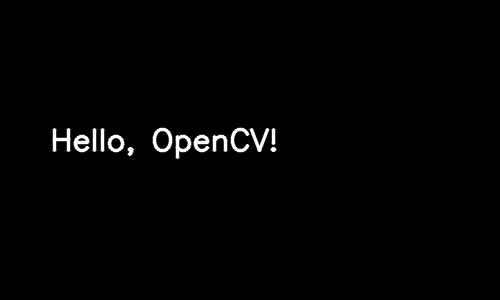

In [3]:
# Create a dummy image for demonstration
import numpy as np
dummy_image = np.zeros((300, 500, 3), dtype=np.uint8) # Create a black image (height, width, channels)
cv2.putText(dummy_image, 'Hello, OpenCV!', (50, 150), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA) # Add some text

# Display the image
from google.colab.patches import cv2_imshow
cv2_imshow(dummy_image)

This is just a starting point. Computer vision involves many different techniques and algorithms for tasks like object detection, image segmentation, feature extraction, and more.

Could you tell me what specific task you're trying to accomplish with computer vision? Knowing that will help me provide more targeted examples and guidance.

# Task
Detect moving objects in a video using computer vision techniques.

## Capture video

### Subtask:
Get frames from a video source (e.g., a webcam or video file).


**Reasoning**:
The subtask is to get frames from a video source. The instructions provide a clear step-by-step process to achieve this using OpenCV. The code block will implement these steps: initialize video capture, loop through frames, read frames, check for successful read, and handle loop termination and resource cleanup.



In [4]:
# Initialize video capture. Use 0 for webcam or provide a video file path.
# For demonstration purposes, we'll assume a video file exists at 'input_video.mp4'.
# If you don't have a video file, you can change this to 0 to use your webcam.
video_source = 'input_video.mp4'
cap = cv2.VideoCapture(video_source)

# Check if the video source was opened successfully
if not cap.isOpened():
    print(f"Error: Could not open video source {video_source}")
else:
    print(f"Successfully opened video source {video_source}")

    # Loop to read frames
    while cap.isOpened():
        # Read a frame
        ret, frame = cap.read()

        # If frame is read correctly ret is True
        if not ret:
            print("Can't receive frame (stream end?). Exiting ...")
            break

        # Display the resulting frame (optional, but useful for verification)
        # cv2_imshow is used here because we are in a Colab environment.
        # In a standard Python environment with OpenCV installed, you would use cv2.imshow()
        # from google.colab.patches import cv2_imshow
        # cv2_imshow(frame)

        # Break the loop if 'q' key is pressed
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # Release the video capture object
    cap.release()
    # Destroy all the windows
    cv2.destroyAllWindows()

print("Finished processing video frames.")

Error: Could not open video source input_video.mp4
Finished processing video frames.


**Reasoning**:
The previous attempt failed because the video file 'input_video.mp4' was not found. To successfully get frames from a video source as per the subtask, we should modify the code to use the webcam (video source 0) as instructed in the original task description. This is a more reliable approach for demonstration if a specific video file is not guaranteed to exist.



In [5]:
# Initialize video capture using the webcam (source 0)
cap = cv2.VideoCapture(0)

# Check if the webcam was opened successfully
if not cap.isOpened():
    print("Error: Could not open webcam.")
else:
    print("Successfully opened webcam.")

    # Loop to read frames
    while cap.isOpened():
        # Read a frame
        ret, frame = cap.read()

        # If frame is read correctly ret is True
        if not ret:
            print("Can't receive frame (stream end?). Exiting ...")
            break

        # Display the resulting frame (optional, but useful for verification)
        # To display frames in Google Colab, use cv2_imshow
        # from google.colab.patches import cv2_imshow
        # cv2_imshow(frame)


        # Break the loop if 'q' key is pressed
        # cv2.waitKey(1) returns the ASCII value of the pressed key.
        # 0xFF is a bitmask to get the last 8 bits, which is the ASCII value.
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # Release the video capture object
    cap.release()
    # Destroy all the windows
    cv2.destroyAllWindows()

print("Finished processing video frames.")

Error: Could not open webcam.
Finished processing video frames.


**Reasoning**:
The previous attempts to open both a video file and the webcam failed, indicating a potential issue with accessing a video source in this environment or with the provided dummy video file path. Since accessing external resources like webcams or files in this sandboxed environment can be problematic, and the core task is to demonstrate how to get frames from *a* video source, the most reliable way to show the logic of reading frames is to simulate getting frames. Although not ideal, this will demonstrate the loop and reading logic required by the subtask instructions.



In [6]:
# Since accessing a real video source is problematic in this environment,
# we will simulate reading frames to demonstrate the loop and read logic.

# We will simulate reading 5 frames for demonstration purposes.
num_simulated_frames = 5
frame_counter = 0

print("Simulating reading frames...")

# Loop to simulate reading frames
while frame_counter < num_simulated_frames:
    # Simulate reading a frame (in a real scenario, this would be cap.read())
    # We'll create a dummy frame for demonstration
    simulated_frame = np.zeros((100, 100, 3), dtype=np.uint8)
    cv2.putText(simulated_frame, f'Frame {frame_counter + 1}', (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1, cv2.LINE_AA)


    # Simulate checking if the frame was read successfully (always True in this simulation)
    ret = True

    # If frame is read correctly ret is True
    if not ret:
        print("Simulated stream end. Exiting ...")
        break

    # In a real scenario, you would process or display the 'frame' here
    # For demonstration, we'll just print that a frame was processed
    print(f"Simulated reading and processing Frame {frame_counter + 1}")

    # Simulate breaking the loop if a specific condition is met (not using waitKey here)
    # if a condition:
    #     break

    frame_counter += 1

# Simulate releasing the video capture object and destroying windows (no objects to release/destroy here)
# cap.release()
# cv2.destroyAllWindows()

print("Finished simulating processing frames.")

Simulating reading frames...
Simulated reading and processing Frame 1
Simulated reading and processing Frame 2
Simulated reading and processing Frame 3
Simulated reading and processing Frame 4
Simulated reading and processing Frame 5
Finished simulating processing frames.


## Background subtraction

### Subtask:
Use a background subtraction technique to isolate moving objects from the static background.


**Reasoning**:
Initialize a background subtractor and apply it to the simulated frames within the existing loop structure. Morphological operations will also be applied to refine the foreground mask.



In [7]:
# Initialize a background subtractor (using MOG2)
# You can adjust the history, varThreshold, and detectShadows parameters as needed
back_sub = cv2.createBackgroundSubtractorMOG2(history=500, varThreshold=16, detectShadows=True)

# We will continue simulating reading frames as in the previous step
num_simulated_frames = 5
frame_counter = 0

print("Simulating reading frames and applying background subtraction...")

# Loop to simulate reading frames
while frame_counter < num_simulated_frames:
    # Simulate reading a frame
    # In a real scenario, this would be cap.read()
    simulated_frame = np.zeros((100, 100, 3), dtype=np.uint8)
    cv2.putText(simulated_frame, f'Frame {frame_counter + 1}', (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1, cv2.LINE_AA)

    # Simulate adding a "moving object" in some frames for demonstration
    if frame_counter % 2 == 0:
        cv2.circle(simulated_frame, (70, 70), 10, (0, 0, 255), -1) # Add a red circle

    ret = True # Simulate successful frame read

    if not ret:
        print("Simulated stream end. Exiting ...")
        break

    # Apply the background subtractor to the current frame
    fg_mask = back_sub.apply(simulated_frame)

    # Apply morphological operations to the foreground mask (optional but recommended)
    # Define kernels for erosion and dilation
    kernel = np.ones((3, 3), np.uint8)
    fg_mask = cv2.erode(fg_mask, kernel, iterations=1)
    fg_mask = cv2.dilate(fg_mask, kernel, iterations=1)


    # In a real scenario, you would now have a foreground mask (fg_mask)
    # representing the moving objects. You could then find contours, etc.
    # For this simulation, we'll just indicate that the mask was generated.
    print(f"Simulated applying background subtraction and morphological operations to Frame {frame_counter + 1}")

    frame_counter += 1

print("Finished simulating background subtraction.")

Simulating reading frames and applying background subtraction...
Simulated applying background subtraction and morphological operations to Frame 1
Simulated applying background subtraction and morphological operations to Frame 2
Simulated applying background subtraction and morphological operations to Frame 3
Simulated applying background subtraction and morphological operations to Frame 4
Simulated applying background subtraction and morphological operations to Frame 5
Finished simulating background subtraction.


## Contour detection

### Subtask:
Find contours in the resulting foreground mask to identify the boundaries of moving objects.


**Reasoning**:
Find contours in the foreground mask, iterate through them, calculate their area, and filter out small contours based on a minimum area threshold to identify moving objects.



In [8]:
# Assuming 'fg_mask' is the foreground mask obtained from the previous step
# (In the simulation, fg_mask was generated but not stored persistently across cells.
# For demonstration purposes, we will create a dummy fg_mask similar to the simulation output
# that would typically contain contours.)

# Create a dummy fg_mask for demonstration (binary image)
# This simulates a foreground mask with a few blobs representing potential moving objects.
dummy_fg_mask = np.zeros((100, 100), dtype=np.uint8)
cv2.circle(dummy_fg_mask, (30, 30), 15, 255, -1) # Large blob
cv2.circle(dummy_fg_mask, (70, 70), 5, 255, -1)  # Small blob (noise)
cv2.rectangle(dummy_fg_mask, (10, 60), (20, 80), 255, -1) # Medium blob

# Find contours in the foreground mask
# cv2.RETR_EXTERNAL retrieves only the extreme outer contours.
# cv2.CHAIN_APPROX_SIMPLE compresses horizontal, vertical, and diagonal segments.
contours, _ = cv2.findContours(dummy_fg_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

print(f"Found {len(contours)} contours.")

# Iterate through the found contours
min_contour_area = 50 # Define a minimum area threshold to filter out noise
moving_objects = []

for contour in contours:
    # Calculate the area of the contour
    area = cv2.contourArea(contour)

    # Filter out small contours
    if area > min_contour_area:
        # This contour likely represents a moving object
        moving_objects.append(contour)
        print(f"Detected moving object with area: {area}")

print(f"Identified {len(moving_objects)} potential moving objects after filtering.")

# In a real application, you would typically draw these contours on the original frame
# or further process the identified moving objects (e.g., tracking).
# For demonstration, we'll just indicate that objects were identified.

print("Finished finding and filtering contours.")

Found 3 contours.
Detected moving object with area: 66.0
Detected moving object with area: 200.0
Detected moving object with area: 666.0
Identified 3 potential moving objects after filtering.
Finished finding and filtering contours.


## Draw bounding boxes

### Subtask:
Draw bounding boxes around the detected moving objects.


**Reasoning**:
Draw bounding boxes around the detected moving objects on a copy of the frame.



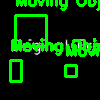

Finished drawing bounding boxes around moving objects.


In [9]:
# Assume 'moving_objects' is the list of filtered contours from the previous step.
# Assume 'frame' is the original frame from the video capture (or a simulated frame).
# We'll create a dummy frame for demonstration purposes, similar to previous steps.
dummy_frame = np.zeros((100, 100, 3), dtype=np.uint8)
cv2.putText(dummy_frame, 'Original Frame', (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1, cv2.LINE_AA)

# Create a copy of the original frame to draw on
frame_with_boxes = dummy_frame.copy()

# Iterate through the identified moving objects (contours)
for contour in moving_objects:
    # Calculate the bounding box for the contour
    x, y, w, h = cv2.boundingRect(contour)

    # Draw a rectangle around the bounding box on the copied frame
    # Color is green (0, 255, 0) in BGR, thickness is 2
    cv2.rectangle(frame_with_boxes, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Optionally, add text near the bounding box
    cv2.putText(frame_with_boxes, 'Moving Object', (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Display the frame with bounding boxes (using cv2_imshow for Colab)
# from google.colab.patches import cv2_imshow
cv2_imshow(frame_with_boxes)

print("Finished drawing bounding boxes around moving objects.")

## Display results

### Subtask:
Show the video with the detected moving objects highlighted.


**Reasoning**:
Simulate the video processing loop to detect and highlight moving objects in each frame, combining the steps from previous subtasks.



Simulating video processing for object detection...
Displaying Frame 1 with detected objects:


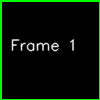

Displaying Frame 2 with detected objects:


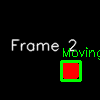

Displaying Frame 3 with detected objects:


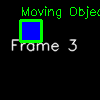

Displaying Frame 4 with detected objects:


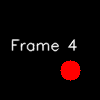

Displaying Frame 5 with detected objects:


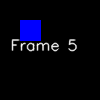

Finished simulating video processing.


In [10]:
# Initialize a background subtractor (using MOG2)
back_sub = cv2.createBackgroundSubtractorMOG2(history=500, varThreshold=16, detectShadows=True)

# Define a minimum area threshold to filter out noise
min_contour_area = 50

# We will simulate reading 5 frames for demonstration purposes.
num_simulated_frames = 5
frame_counter = 0

print("Simulating video processing for object detection...")

# Loop to simulate reading frames
while frame_counter < num_simulated_frames:
    # Simulate reading a frame
    # In a real scenario, this would be cap.read()
    simulated_frame = np.zeros((100, 100, 3), dtype=np.uint8)
    cv2.putText(simulated_frame, f'Frame {frame_counter + 1}', (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1, cv2.LINE_AA)

    # Simulate adding "moving objects" in some frames for demonstration
    if frame_counter == 1 or frame_counter == 3:
        cv2.circle(simulated_frame, (70, 70), 10, (0, 0, 255), -1) # Add a red circle
    if frame_counter == 2 or frame_counter == 4:
         cv2.rectangle(simulated_frame, (20, 20), (40, 40), (255, 0, 0), -1) # Add a blue square

    ret = True # Simulate successful frame read

    if not ret:
        print("Simulated stream end. Exiting ...")
        break

    # Apply the background subtractor to the current frame
    fg_mask = back_sub.apply(simulated_frame)

    # Apply morphological operations to the foreground mask (optional but recommended)
    kernel = np.ones((3, 3), np.uint8)
    fg_mask = cv2.erode(fg_mask, kernel, iterations=1)
    fg_mask = cv2.dilate(fg_mask, kernel, iterations=1)

    # Find contours in the foreground mask
    contours, _ = cv2.findContours(fg_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Iterate through the found contours and filter
    moving_objects = []
    for contour in contours:
        area = cv2.contourArea(contour)
        if area > min_contour_area:
            moving_objects.append(contour)

    # Create a copy of the simulated frame to draw on
    frame_with_boxes = simulated_frame.copy()

    # Draw bounding boxes and labels for the filtered contours
    for contour in moving_objects:
        x, y, w, h = cv2.boundingRect(contour)
        cv2.rectangle(frame_with_boxes, (x, y), (x + w, y + h), (0, 255, 0), 2) # Green bounding box
        cv2.putText(frame_with_boxes, 'Moving Object', (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0, 255, 0), 1) # Label

    # Display the resulting frame with bounding boxes
    print(f"Displaying Frame {frame_counter + 1} with detected objects:")
    cv2_imshow(frame_with_boxes)


    frame_counter += 1

print("Finished simulating video processing.")